<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-2-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [8]:
Y = data['Class'].to_numpy()
# Print the output
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [9]:
# students get this 
transform = preprocessing.StandardScaler()
# Standardize the data (applies to all numeric columns)
X = transform.fit_transform(X)

# Convert back to DataFrame to keep structure (optional)
X = pd.DataFrame(X)

# Print standardized X
print(X)

          0             1         2         3         4      5      6   \
0  -1.712912 -1.948145e-16 -0.653913 -1.575895 -0.973440 -0.106 -0.106   
1  -1.674419 -1.195232e+00 -0.653913 -1.575895 -0.973440 -0.106 -0.106   
2  -1.635927 -1.162673e+00 -0.653913 -1.575895 -0.973440 -0.106 -0.106   
3  -1.597434 -1.200587e+00 -0.653913 -1.575895 -0.973440 -0.106 -0.106   
4  -1.558942 -6.286706e-01 -0.653913 -1.575895 -0.973440 -0.106 -0.106   
..       ...           ...       ...       ...       ...    ...    ...   
85  1.558942  1.991005e+00  0.174991  0.945537  0.202528 -0.106 -0.106   
86  1.597434  1.991005e+00  1.003894  0.945537  0.202528 -0.106 -0.106   
87  1.635927  1.991005e+00  3.490605  0.945537  1.966480 -0.106 -0.106   
88  1.674419  1.991005e+00  1.003894  0.945537  0.202528 -0.106 -0.106   
89  1.712912 -5.192140e-01 -0.653913  0.945537 -0.973440 -0.106 -0.106   

          7      8         9   ...        73        74        75        76  \
0  -0.654654 -0.106 -0.551677  ..

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [10]:
from sklearn.model_selection import train_test_split

# Assuming X and Y are already defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)


we can see we only have 18 test samples.


In [11]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
#parameters ={'C':[0.01,0.1,1],
#             'penalty':['l2'],
#             'solver':['lbfgs']}

In [ ]:
#parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
#lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [ ]:
#print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
#print("accuracy :",logreg_cv.best_score_)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Step 1: Create a Logistic Regression object
logreg = LogisticRegression()

# Step 2: Define hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}  # Example hyperparameters

# Step 3: Create a GridSearchCV object with cv=10
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)

# Print the GridSearchCV object
print(logreg_cv)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})


In [13]:
# Fit GridSearchCV to training data
logreg_cv.fit(X_train, Y_train)

# Print the best hyperparameters and score
print("Best Parameters:", logreg_cv.best_params_)
print("Best Score:", logreg_cv.best_score_)


/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Best Score: 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [14]:
# Calculate accuracy on test data
test_accuracy = logreg_cv.score(X_test, Y_test)

# Print the accuracy
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.8333333333333334


Lets look at the confusion matrix:


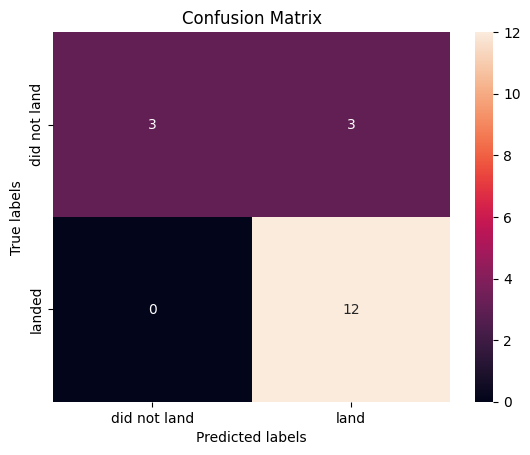

In [15]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
#parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
#              'C': np.logspace(-3, 3, 5),
#              'gamma':np.logspace(-3, 3, 5)}
#svm = SVC()

In [20]:
# Step 1: Create an SVM object
svm = SVC()

In [21]:
# Step 2: Define hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

In [22]:
# Step 3: Create a GridSearchCV object with cv=10
svm_cv = GridSearchCV(svm, param_grid, cv=10)


In [23]:
# Step 4: Fit GridSearchCV to the training data
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [24]:
# Print the best parameters and score
print("Best Parameters:", svm_cv.best_params_)
print("Best Score:", svm_cv.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best Score: 0.8482142857142858


In [19]:
#print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
#print("accuracy :",svm_cv.best_score_)

## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [25]:
# Calculate accuracy on the test set
test_accuracy = svm_cv.score(X_test, Y_test)

# Print the accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8333333333333334


We can plot the confusion matrix


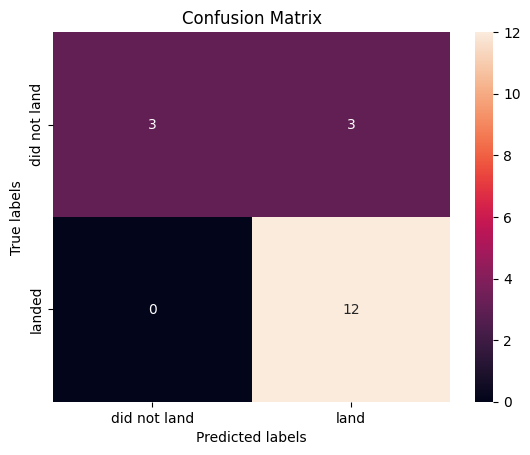

In [26]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
#parameters = {'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [2*n for n in range(1,10)],
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10]}

#tree = DecisionTreeClassifier()

In [27]:
# Step 1: Create a Decision Tree classifier object
tree = DecisionTreeClassifier()

In [28]:
# Step 2: Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples at a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

In [29]:
# Step 3: Create a GridSearchCV object with cv=10
tree_cv = GridSearchCV(tree, param_grid, cv=10)

In [30]:
# Step 4: Fit GridSearchCV to the training data
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [31]:
# Print the best parameters and score
print("Best Parameters:", tree_cv.best_params_)
print("Best Score:", tree_cv.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.8714285714285713


In [ ]:
#print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
#print("accuracy :",tree_cv.best_score_)

## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [32]:
# Calculate accuracy on the test set
test_accuracy = tree_cv.score(X_test, Y_test)

# Print the accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8333333333333334


We can plot the confusion matrix


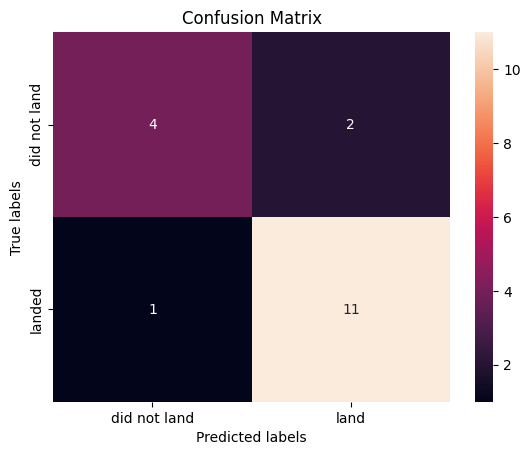

In [33]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
#parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#              'p': [1,2]}

#KNN = KNeighborsClassifier()

In [34]:
# Step 1: Create a KNN object
knn = KNeighborsClassifier()

In [35]:
# Step 2: Define hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

In [36]:
# Step 3: Create a GridSearchCV object with cv=10
knn_cv = GridSearchCV(knn, param_grid, cv=10)

In [37]:
# Step 4: Fit GridSearchCV to the training data
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [38]:
# Print the best parameters and score
print("Best Parameters:", knn_cv.best_params_)
print("Best Score:", knn_cv.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best Score: 0.8482142857142858


In [ ]:
#print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
#print("accuracy :",knn_cv.best_score_)

## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [39]:
# Calculate accuracy on the test set
test_accuracy = knn_cv.score(X_test, Y_test)

# Print the accuracy
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.8333333333333334


We can plot the confusion matrix


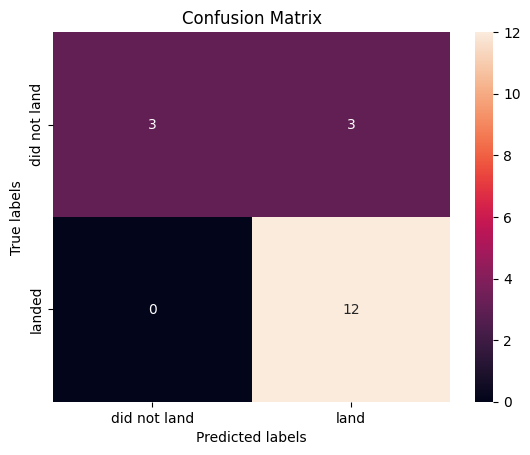

In [40]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


Model Comparison Results:
                          Model  Test Accuracy
0           Logistic Regression       0.833333
1  Support Vector Machine (SVM)       0.833333
2                 Decision Tree       0.833333
3     K-Nearest Neighbors (KNN)       0.833333

Best Model:
Model            Logistic Regression
Test Accuracy               0.833333
Name: 0, dtype: object


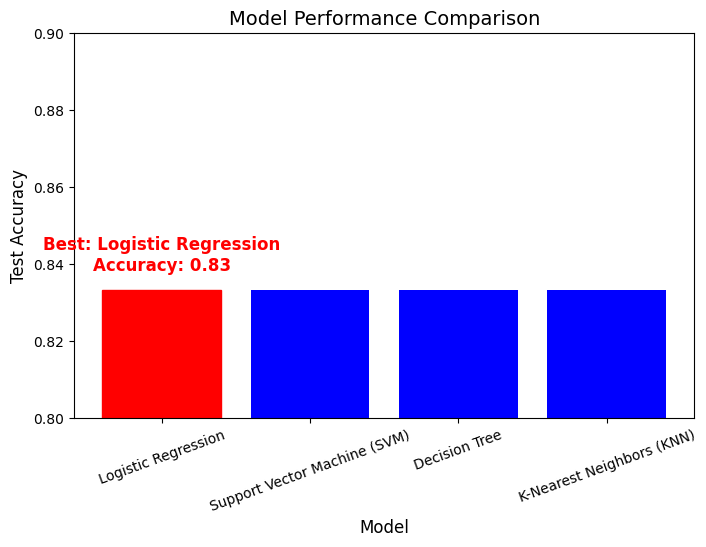

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Define test accuracy scores from previous results
model_results = {
    "Logistic Regression": 0.8333333333333334,
    "Support Vector Machine (SVM)": 0.8333333333333334,
    "Decision Tree": 0.8333333333333334,
    "K-Nearest Neighbors (KNN)": 0.8333333333333334
}


# Convert results to a Pandas DataFrame
results_df = pd.DataFrame(list(model_results.items()), columns=['Model', 'Test Accuracy'])

# Find the best model (highest accuracy)
best_model = results_df.loc[results_df['Test Accuracy'].idxmax()]

# Print the results
print("Model Comparison Results:")
print(results_df)
print("\nBest Model:")
print(best_model)

# Plot a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(results_df['Model'], results_df['Test Accuracy'], color=['blue', 'blue', 'blue', 'blue'])

# Highlight the best model in red
best_index = results_df['Test Accuracy'].idxmax()
bars[best_index].set_color('red')

# Add title and labels
plt.title("Model Performance Comparison", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
plt.xticks(rotation=20)
plt.ylim(0.8, 0.9)  # Adjust y-axis limits for better visualization

# Annotate the best model
plt.text(best_index, best_model['Test Accuracy'] + 0.005, f"Best: {best_model['Model']}\nAccuracy: {best_model['Test Accuracy']:.2f}",
         ha='center', fontsize=12, fontweight='bold', color='red')

# Show the plot
plt.show()

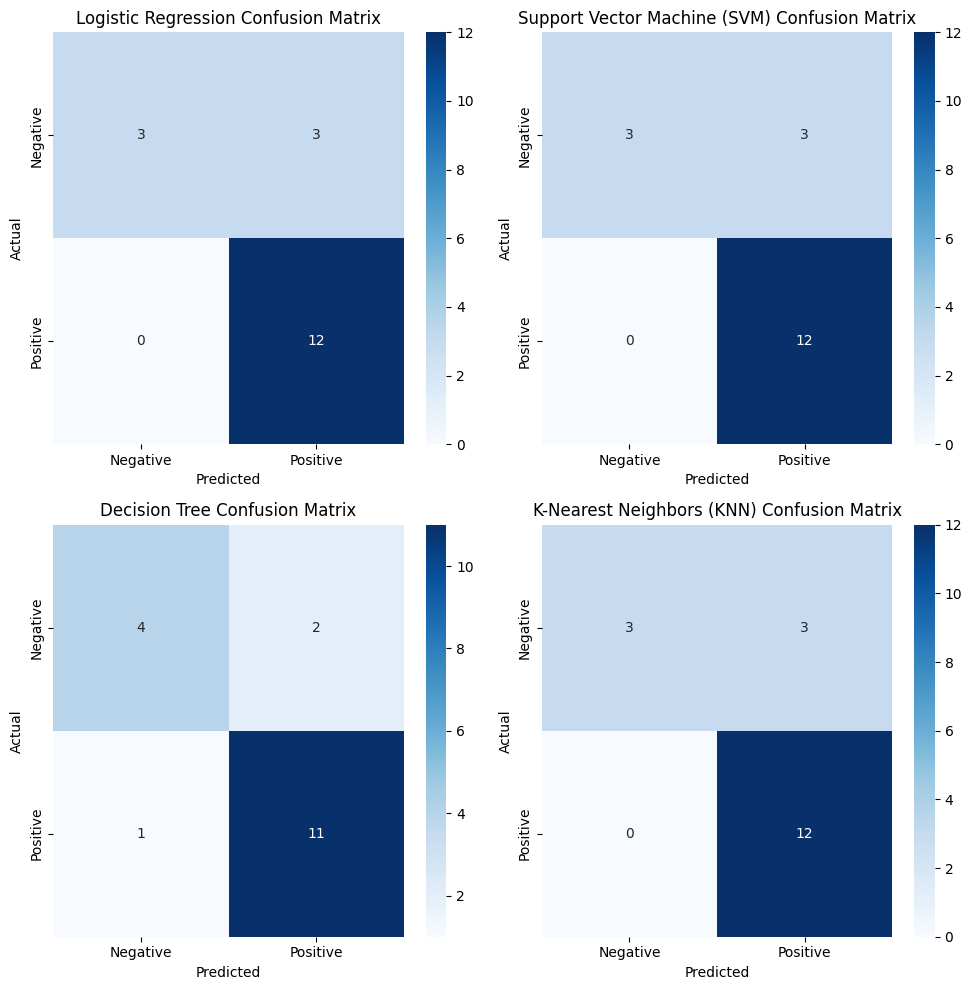


Logistic Regression Classification Report:
              precision    recall  f1-score    support
0              1.000000  0.500000  0.666667   6.000000
1              0.800000  1.000000  0.888889  12.000000
accuracy       0.833333  0.833333  0.833333   0.833333
macro avg      0.900000  0.750000  0.777778  18.000000
weighted avg   0.866667  0.833333  0.814815  18.000000

Support Vector Machine (SVM) Classification Report:
              precision    recall  f1-score    support
0              1.000000  0.500000  0.666667   6.000000
1              0.800000  1.000000  0.888889  12.000000
accuracy       0.833333  0.833333  0.833333   0.833333
macro avg      0.900000  0.750000  0.777778  18.000000
weighted avg   0.866667  0.833333  0.814815  18.000000

Decision Tree Classification Report:
              precision    recall  f1-score    support
0              0.800000  0.666667  0.727273   6.000000
1              0.846154  0.916667  0.880000  12.000000
accuracy       0.833333  0.833333  0.833

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# List of trained models
models = {
    "Logistic Regression": logreg_cv,
    "Support Vector Machine (SVM)": svm_cv,
    "Decision Tree": tree_cv,
    "K-Nearest Neighbors (KNN)": knn_cv
}

# Initialize dictionaries to store evaluation results
confusion_matrices = {}
classification_reports = {}

# Plot confusion matrices for all models
plt.figure(figsize=(10, 10))

for i, (name, model) in enumerate(models.items()):
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices[name] = cm
    
    # Compute classification report
    classification_reports[name] = classification_report(Y_test, y_pred, output_dict=True)
    
    # Plot confusion matrix
    plt.subplot(2, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Display classification reports
for name, report in classification_reports.items():
    print(f"\n{name} Classification Report:")
    print(pd.DataFrame(report).transpose())

# Select the best model based on F1-score for the Positive class (1)
best_model = max(models, key=lambda model: classification_reports[model]['1']['f1-score'])
print(f"\n🚀 Best Model Based on F1-Score: {best_model}")


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
